In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Load the uploaded data
file_path = 'dataset/House_Data.csv'

# Load the CSV file into a DataFrame
house_data = pd.read_csv(file_path)

house_data.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [35]:
# Convert all values in the "size" column to strings, extract digits, and convert back to numeric
house_data['size'] = house_data['size'].astype(str).str.extract('(\d+)').astype(float)
# Display the updated dataset to verify
print(house_data.head())

              area_type   availability  size  society total_sqft  bath  \
0  Super built-up  Area         19-Dec   2.0  Coomee        1056   2.0   
1            Plot  Area  Ready To Move   4.0  Theanmp       2600   5.0   
2        Built-up  Area  Ready To Move   3.0      NaN       1440   2.0   
3  Super built-up  Area  Ready To Move   3.0  Soiewre       1521   3.0   
4  Super built-up  Area  Ready To Move   2.0      NaN       1200   2.0   

   balcony   price    site_location  
0      1.0   39.07      Alandi Road  
1      3.0  120.00  Ambegaon Budruk  
2      3.0   62.00       Anandnagar  
3      1.0   95.00            Aundh  
4      1.0   51.00       Aundh Road  


In [36]:
# Checking for missing values
house_data.isnull().sum()


area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [48]:
# Separate numeric and text columns
numeric_columns = house_data.select_dtypes(include=["number"]).columns
text_columns = house_data.select_dtypes(include=["object"]).columns

# Fill numeric columns with the median
house_data[numeric_columns] = house_data[numeric_columns].fillna(house_data[numeric_columns].median())

# Fill text columns with a placeholder
house_data[text_columns] = house_data[text_columns].fillna("Unknown")

# Check if there are still any missing values
print(house_data.isnull().sum())

area_type        0
availability     0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64


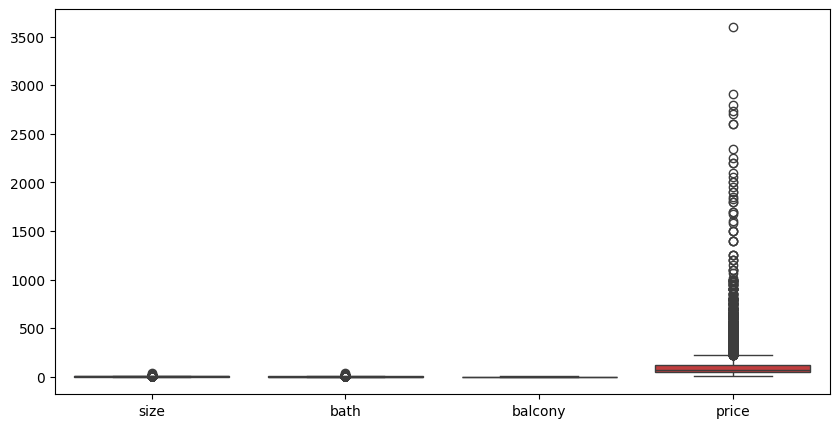

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=house_data)
plt.show()

In [50]:
# Selecting numeric columns from the original house_data dataset
numeric_columns_only = house_data.select_dtypes(include=['number'])

# Detecting outliers in the dataset using the IQR method
Q1 = numeric_columns_only.quantile(0.25)
Q3 = numeric_columns_only.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((numeric_columns_only < (Q1 - 1.5 * IQR)) | (numeric_columns_only > (Q3 + 1.5 * IQR)))

# Extract rows with outliers and drop rows that are fully NaN after filtering
numeric_columns_only[outliers].dropna()



,size,bath,balcony,price


In [51]:
# Removing outliers using the IQR method
df_cleaned = numeric_columns_only[~((numeric_columns_only < (Q1 - 1.5 * IQR)) | (numeric_columns_only > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.head()

,size,bath,balcony,price
0,2.0,2.0,1.0,39.07
2,3.0,2.0,3.0,62.00
3,3.0,3.0,1.0,95.00
4,2.0,2.0,1.0,51.00
5,2.0,2.0,1.0,38.00
